# 🧠 House Price Prediction – My First ML Model

This project helped me understand how to:
- Work with missing data
- Train and test a machine learning model
- Make predictions
- Evaluate and visualize results

I built it with help from online learning + practice, and I’m using this as my first GitHub portfolio project.


### Step 1 – Import libraries

These are the Python libraries I used:

- `pandas` and `numpy`: for working with data tables and numbers  
- `matplotlib` and `seaborn`: for making graphs and plots  
- `scikit-learn`: to train and test a machine learning model  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


### Step 2 – Load the dataset

I loaded a real housing dataset using `pandas`.  
- `df.shape` shows the number of rows and columns.
- `df.head()` shows the first few rows of the table.


In [2]:
# 1. Read the CSV into a DataFrame
df = pd.read_csv("train.csv")

# 2. Quick sanity check
print("Rows,Cols:", df.shape)
df.head(3)


Rows,Cols: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


### Step 3 – Clean the data

Real-world data usually has missing values.

- I dropped columns where more than 30% of the data was missing.
- For the rest, I filled missing numeric values using the **median**.
- Then I double-checked how many missing values were left.


In [3]:
# Drop columns with >30% missing values
missing_pct = df.isnull().mean()
drop_cols = missing_pct[missing_pct > 0.3].index
df = df.drop(columns=drop_cols)

# Fill remaining numeric NaNs with the median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Verify no more big gaps
df.isnull().sum().sort_values(ascending=False).head(5)


,0
GarageFinish,81
GarageCond,81
GarageQual,81
GarageType,81
BsmtFinType2,38


### Step 4 – Select features and target

I chose a few columns (features) that likely affect house price:
- Overall quality
- Living area
- Garage size
- Basement size

The target I'm predicting is the **SalePrice** column.


In [4]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
X = df[features]
y = df['SalePrice']

print("X shape:", X.shape, "y shape:", y.shape)


X shape: (1460, 4) y shape: (1460,)


### Step 5 – Train and test the model

I used a simple **Linear Regression** model from scikit-learn.

- I split the data: 80% for training, 20% for testing.
- The model learns the relationship between features and price.
- I measured performance using **Mean Absolute Error (MAE)** — lower is better.


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 25446.0547392125


### Step 6 – Visualize predictions

This scatter plot compares the actual prices vs the predicted ones.

- A perfect model would have all points along a diagonal line.
- My model isn’t perfect, but it’s learning the trend.


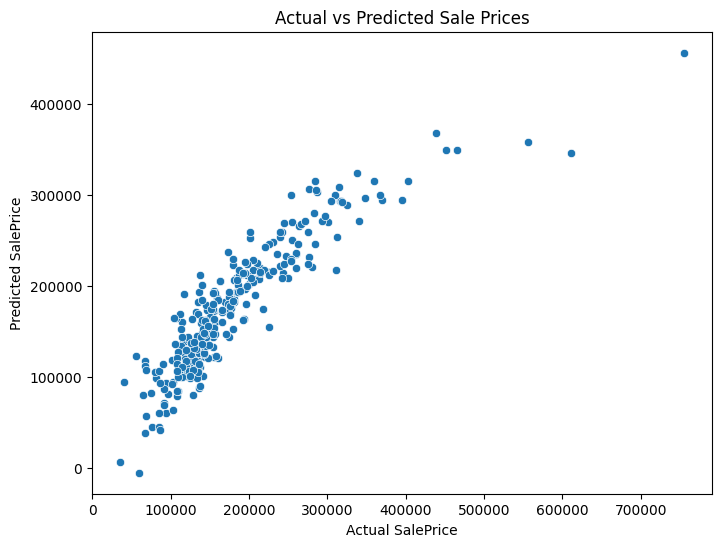

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Sale Prices")
plt.show()


# 🏠 House Prices Prediction - My First ML Model

**Features:** OverallQual, GrLivArea, GarageCars, TotalBsmtSF  
**Model:** Linear Regression  
**MAE:** 25446.0547392125

**Steps:**
1. Loaded data
2. Dropped columns with >30% missing
3. Filled missing values with medians
4. Trained/test split
5. Trained Linear Regression and evaluated MAE
6. Plotted actual vs predicted prices


## ✅ Final thoughts

This was my first full machine learning project.  
What I practiced:
- Data cleaning
- Feature selection
- Model training and testing
- Visualizing results
- Explaining code clearly

I’ll keep building more projects like this and improving with time.
